# Image Compression with Singular Value Decomposition

Singular Value Decomposition is a method to factorize a Matrix.
It has several different applications, a particular application of SVD is in image compression

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
from skimage.color import rgb2gray

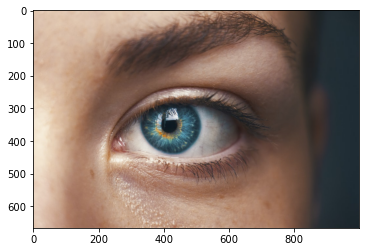

In [2]:
A = imread('data/eye.jpg')
img = plt.imshow(A)

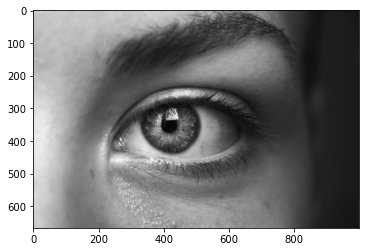

In [3]:
#Converting to grayscale
X = rgb2gray(A) * 255
plt.imshow(X, cmap='gray')

### Using Numpy's Linear Algebra Library to factorize our image using SVD

In [4]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

### Using the singular values of rank r to achieve different levels of compression

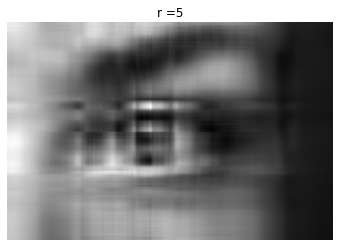

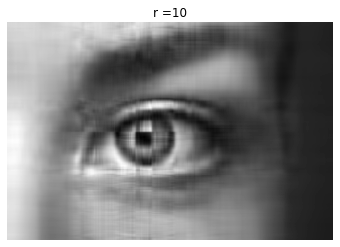

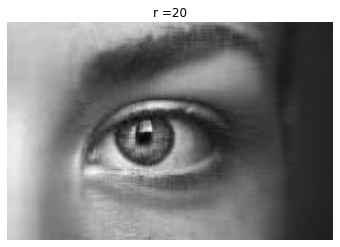

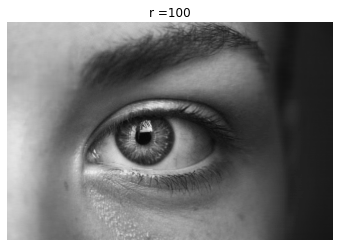

In [5]:
fig = 0
for r in (5, 10, 20, 100):
    Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
    
    #Plotting
    plt.figure(fig)
    fig += 1
    plt.imshow(Xapprox, cmap='gray')
    plt.title(f'r ={r}')
    plt.axis('off')

As we can see the higher the rank the clearer the image becomes

In [6]:
len(S)

667

We observe that there is 667 singular values in the factorization of our image.

We can further explore this idea using plots. We will analyse how much energy each singular value contains.

Text(0.5, 1.0, 'Singular Values')

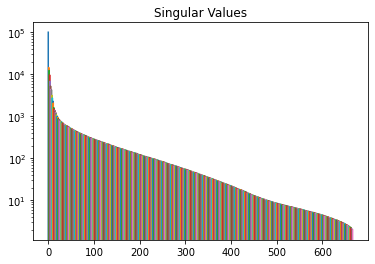

In [7]:
plt.semilogy(S)
plt.title('Singular Values')

We observe the singular values with highest magnitude are in the first 25 columns of the Diagnol Matrix (S).

Text(0.5, 1.0, 'Cumulative Distribution of Singular Values')

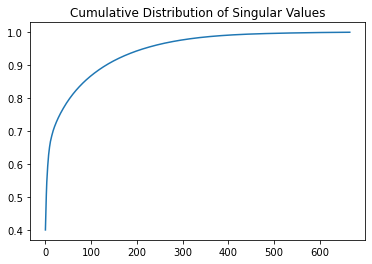

In [8]:
c = np.cumsum(np.diag(S))/np.sum(S)
plt.plot(c)
plt.title('Cumulative Distribution of Singular Values')

In [9]:
c[:25]

array([0.39943595, 0.45726109, 0.50640451, 0.54484488, 0.57211159,
       0.59300574, 0.61047844, 0.6275035 , 0.64001263, 0.65085641,
       0.66000237, 0.66822449, 0.67460969, 0.68056022, 0.68607451,
       0.69142495, 0.69635761, 0.70112548, 0.70540356, 0.70937819,
       0.71331217, 0.71701408, 0.72052586, 0.72389635, 0.72722327])

We observe the first singular value captures 40% of the information in the image, and 25 of the top singular values capture 75% of the data